In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
prompt = "a woman face"
image = pipe(prompt, num_inference_steps=25).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [23]:
import datasets
import torchvision

dataset = datasets.load_dataset("imagefolder", data_dir="./datasets/glam_ai_faces/train-rotated")
train_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(512),
        torchvision.transforms.CenterCrop(512),
        torchvision.transforms.RandomRotation(15, torchvision.transforms.InterpolationMode.BICUBIC, fill=128),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.5], [0.5]),
    ]
)

def transform(examples):
    images = [train_transform(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}
dataset.set_transform(transform)

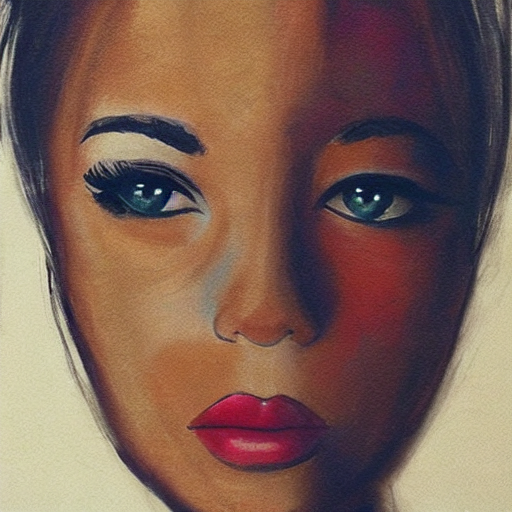

In [7]:
image

In [1]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

In [3]:
pipeline = AutoPipelineForInpainting.from_pretrained(
    "sd-legacy/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,
)
pipeline.load_lora_weights("./experiments/woman-lora-cropped-photoPrompt-lr_4e6/checkpoint-3900/")

pipeline.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/dif

In [75]:
init_image = load_image("./datasets/glam_ai_faces/target/target_C.png")
mask_image = load_image("./datasets/glam_ai_faces/target/masks/target_C.png")

In [76]:
import numpy as np

mask_array = np.array(mask_image).mean(-1)
mask_x = np.where(mask_array.max(0) > 20)[0]
mask_y = np.where(mask_array.max(1) > 20)[0]

mask_l = mask_x.min()
mask_r = mask_x.max()
mask_t = mask_y.min()
mask_b = mask_y.max()

mask_width = (mask_r - mask_l).item()
mask_height = (mask_b - mask_t).item()

In [77]:
for strength in range(1, 20+1):
    strength /= 20
    
    image = pipeline(
        prompt="a photo of a woman face",
        image=init_image,
        mask_image=mask_image,
        generator=torch.Generator("cuda").manual_seed(92),
        padding_mask_crop=int(mask_width * 0.9),
        strength=strength,
    ).images[0]
    make_image_grid([init_image, image], rows=1, cols=2).save(f"./experiments/woman-lora-cropped-photoPrompt-lr_4e6/checkpoint-3900/target_C_strength-{strength:.2f}.jpg")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]